In [1]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

from __future__ import print_function
from sklearn import preprocessing

from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from keras import backend as K

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def plot_autoencoder_outputs(autoencoder, x_test, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

    (x_train, y_train), (x_test, y_test) = mnist.load_data()

def own_kullback_leibler_divergence(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.sum(y_true * K.log(y_true / y_pred), axis=-1)

def own_mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def own_loss(y_true, y_pred):
    return own_kullback_leibler_divergence(y_true, y_pred)*0.05+own_mean_squared_error(y_true, y_pred)


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train = 255 - x_train
x_train = 255 - x_train

x_train = preprocessing.scale(x_train.astype('float32'), axis=1)
x_test = preprocessing.scale(x_test.astype('float32'), axis=1)

print(x_train.shape)
print(x_test.shape)

input_size = 784
code_size = 49

input_img = Input(shape=(input_size,))
code = Dense(code_size, use_bias = False, activation='relu')(input_img)
output_img = Dense(input_size, use_bias = False, activation='sigmoid')(code)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss=own_loss)

autoencoder.fit(x_train, x_train, epochs=20)

for i in range(len(autoencoder.get_weights())):
    print(len(autoencoder.get_weights()[i]))

plot_autoencoder_outputs(autoencoder, x_test, 5, (28, 28))

weights = autoencoder.get_weights()[0].T

n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

/home/hoffmann/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(60000, 784)
(10000, 784)
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.6166
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.4539
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.4221
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.4049
Epoch 5/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3896
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3797
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3706
Epoch 8/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3619
Epoch 9/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3551
Epoch 10/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3462
Epoch 11/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3398
Epoch 12/20
60000/60000 [=

<Figure size 1000x450 with 10 Axes>

<Figure size 2000x500 with 9 Axes>

784


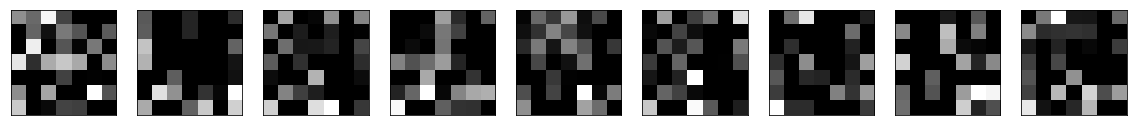

In [2]:
    input_img_2 = Input(shape=(input_size,))
    code_2 = Dense(code_size, activation='relu', use_bias = False)(input_img_2)
    output_img_2 = Dense(input_size, activation='sigmoid', use_bias = False)(code)

    #hidden_1_2.set_weights(weights)

    autoencoder_2 = Model(input_img_2, code_2)
    coding = autoencoder_2.predict(x_test)
    
    for i in range(len(autoencoder_2.get_weights())):
        print(len(autoencoder_2.get_weights()[i]))
    
    for i in range(2):
        autoencoder_2.layers[i].set_weights(autoencoder.layers[i].get_weights())

    n = 9
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(coding[i].reshape(7, 7))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


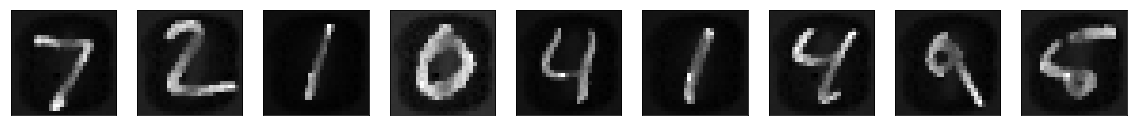

In [3]:
a = np.zeros((784))
w = autoencoder.get_weights()[0]

for i in range(784):
    for j in range(49):
        a[i]+=w[i][j]**2
        
a=np.sqrt(a)

ww = np.zeros((len(x_test),784))

for i in range(len(x_test)):
    for j in range(784):
        ww[i][j]=x_test[i][j]*a[j]
        
n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(ww[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


488 2.9657972375185744
500 2.9129816266978557
248 2.795302265608159
135 2.7139423482258858
134 2.691271693337895
612 2.680109988759703
332 2.669906378974182
584 2.623982978776437
719 2.617001521095583
668 2.6061835981124473
[488, 500, 248, 135, 134, 612, 332, 584, 719, 668]


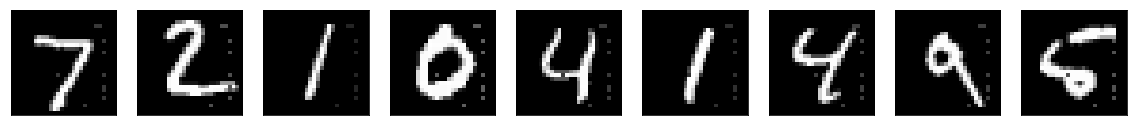

In [4]:
b = np.argsort(a)
c = []
for i in range(10):
    c.append(b[-i-1])
    print(b[-i-1], a[b[-i-1]])

print(c)

x_temp = x_test

for i in range(len(x_test)):
    for j in c:
        x_temp[i][j]=0.5
        
n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_temp[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


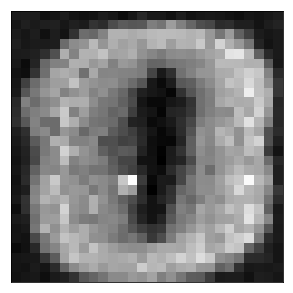

In [5]:
n = 1
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(a.reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
from sklearn import preprocessing

a=[1,2,3,4,5]
b=[[1,2,3,4,5],[1,2,3,4,5]]

print(preprocessing.scale(a))
print(preprocessing.scale(b, axis=1))

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
 [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]]
